In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from math import sin, cos, sqrt, atan2
df = pd.read_csv("../../api/bird_unofficial_api/csv_output.csv")

In [2]:
# Preprocessing and adding date columns
days = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
df['datetime'] = df['time_stamp'].apply(lambda x: datetime.fromtimestamp(x))
df['date_string'] = df['datetime'].apply(lambda x: x.strftime('%Y-%m-%d'))
df['week_day'] = df['datetime'].apply(lambda x: days[x.weekday()])
df['coordinates']= pd.Series(list(zip(df.latitude, df.longitude)))

In [3]:
df.head()

,id,latitude,longitude,battery_level,captive,time_stamp,datetime,date_string,week_day,coordinates
0,9014ca4d-cafc-4834-b37b-cb8bafe6eea0,34.411820,-119.854743,90,False,1551395404,2019-02-28 15:10:04,2019-02-28,thu,"(34.41182, -119.85474333333336)"
1,8a8f7275-2193-48e6-bcee-365144d4bb00,34.413182,-119.857452,100,False,1551395404,2019-02-28 15:10:04,2019-02-28,thu,"(34.41318166666667, -119.85745166666666)"
2,a31f4dd6-be2e-4f8f-97ac-55c157410406,34.413162,-119.857483,100,False,1551395404,2019-02-28 15:10:04,2019-02-28,thu,"(34.41316166666666, -119.85748333333336)"
3,b7ed8cfd-c91a-471c-9e26-6da20b229654,34.410361,-119.857268,76,False,1551395404,2019-02-28 15:10:04,2019-02-28,thu,"(34.4103614520602, -119.85726814728216)"
4,d727f677-2aaa-4a73-90b5-e00e533b8193,34.415275,-119.860435,98,False,1551395404,2019-02-28 15:10:04,2019-02-28,thu,"(34.415274999999994, -119.86043500000001)"


In [4]:
df['date_string'].unique()

array(['2019-02-28', '2019-02-13', '2019-02-09', '2019-01-28',
       '2019-02-26', '2019-02-07', '2019-02-24', '2019-02-11',
       '2019-02-22', '2019-02-19', '2019-02-23', '2019-02-27',
       '2019-02-06', '2019-02-01', '2019-02-15', '2019-02-12',
       '2019-02-03', '2019-02-25', '2019-02-18', '2019-01-24',
       '2019-02-10', '2019-02-04', '2019-02-08', '2019-01-30',
       '2019-02-16', '2019-02-20', '2019-02-21', '2019-02-14',
       '2019-01-26', '2019-03-01', '2019-02-05', '2019-01-25',
       '2019-02-17', '2019-01-27', '2019-01-29', '2019-02-02',
       '2019-01-31'], dtype=object)

In [5]:
# Euclidean distance calculation (only roughly accurate for 10 min interval polling)
# start and end are tuples of (lat, long)
def distance(start, end):
    R = 6373.0
    dlon = end[1] - start[1]
    dlat = end[0] - start[0]
    a = (sin(dlat/2))**2 + cos(start[0]) * cos(end[0]) * (sin(dlon/2))**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    return distance*1000 #km -> meters

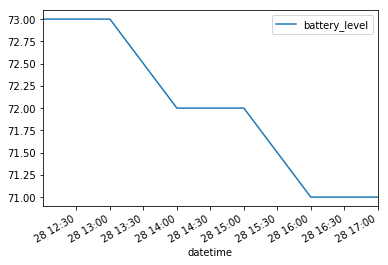

In [6]:
unique_ids = pd.Series(df['id'].values).unique().tolist()
id_df = df[df['id'] == unique_ids[200]]
id_df.plot(x='datetime', y='battery_level')


dict_keys([Timestamp('2019-02-08 04:00:00', freq='10T'), Timestamp('2019-02-08 04:10:00', freq='10T'), Timestamp('2019-02-08 04:20:00', freq='10T'), Timestamp('2019-02-08 04:30:00', freq='10T'), Timestamp('2019-02-08 04:40:00', freq='10T'), Timestamp('2019-02-08 04:50:00', freq='10T'), Timestamp('2019-02-08 05:00:00', freq='10T'), Timestamp('2019-02-08 05:10:00', freq='10T'), Timestamp('2019-02-08 05:20:00', freq='10T'), Timestamp('2019-02-08 05:30:00', freq='10T'), Timestamp('2019-02-08 05:40:00', freq='10T'), Timestamp('2019-02-08 05:50:00', freq='10T'), Timestamp('2019-02-08 06:00:00', freq='10T'), Timestamp('2019-02-08 06:10:00', freq='10T'), Timestamp('2019-02-08 06:20:00', freq='10T'), Timestamp('2019-02-08 06:30:00', freq='10T'), Timestamp('2019-02-08 06:40:00', freq='10T'), Timestamp('2019-02-08 06:50:00', freq='10T'), Timestamp('2019-02-08 07:00:00', freq='10T'), Timestamp('2019-02-08 07:10:00', freq='10T'), Timestamp('2019-02-08 07:20:00', freq='10T'), Timestamp('2019-02-08 0

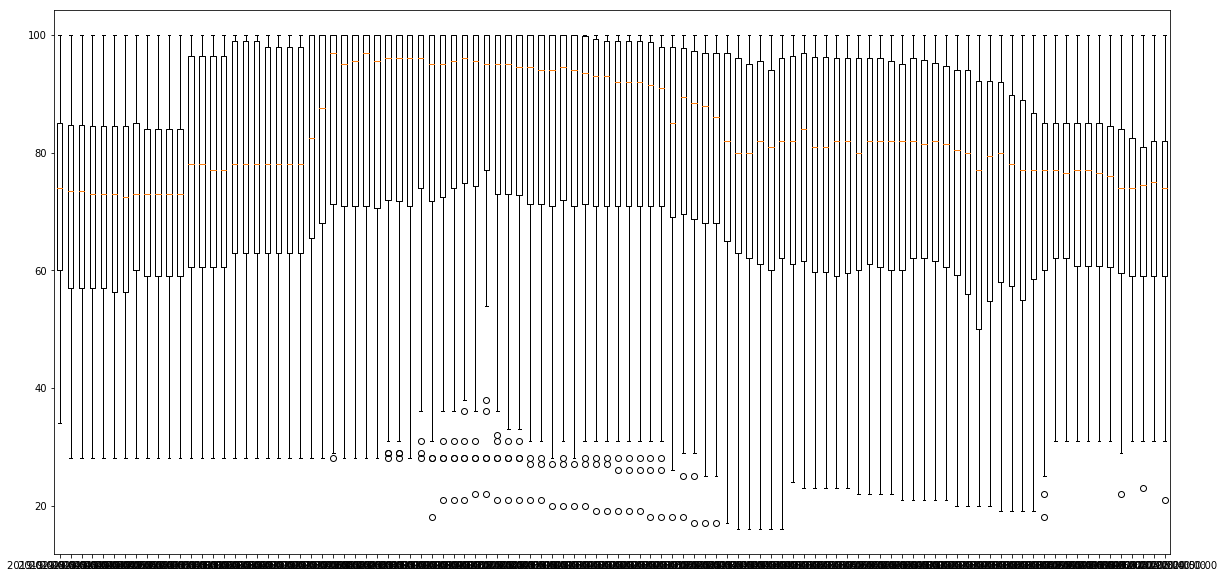

In [7]:
day_df = df[df['date_string'] == '2019-02-08']
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level']
# count_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = count_df.plot(figsize=(20,10), label = 'count')
key_list = []
item_list = []
# ax1 = ax.twinx()
fig, ax = plt.subplots(figsize=(20, 10))
counter = 0
print(freq_df.groups.keys())
for key in freq_df.groups.keys():
    key_list.append(key)
    print(key)
    item_list.append(freq_df.get_group(key))
#     ax1.boxplot(freq_df.get_group(key), notch=0, sym='+', vert=1, whis=1.5)
    counter +=1
ax.boxplot(item_list)
ax.set_xticklabels(key_list)
print(counter)

# day_df.boxplot('battery_level')

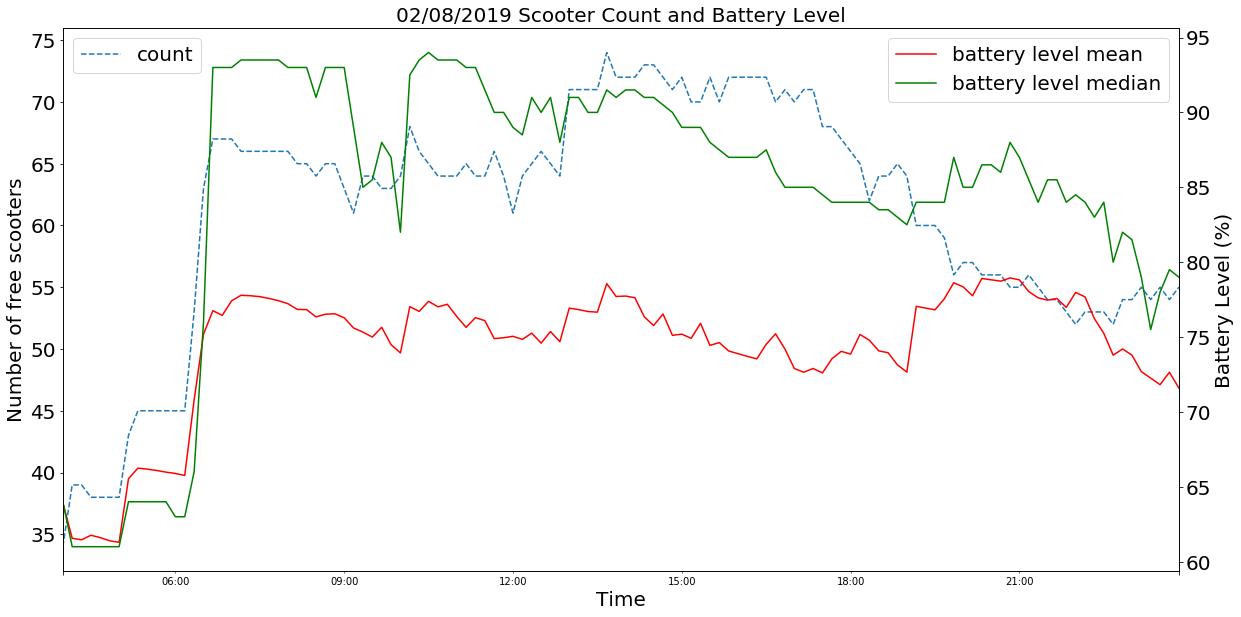

In [8]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-15']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
ax1 = ax.twinx()
ax.set_title("02/08/2019 Scooter Count and Battery Level", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.set_ylabel("Number of free scooters", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax1.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax1.tick_params(axis = 'both', labelsize = fontsize)
bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax1, color= 'red', label = 'battery level mean')
# bat_df_q1.plot(figsize = (20,10), ax=ax1, color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax1, color= 'green', label = 'battery level median')
# bat_df_q3.plot(figsize = (20,10), ax=ax1, color= 'purple', label = 'battery level Quartile 3')
# ax1.set_ylim(bottom=0)
# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)

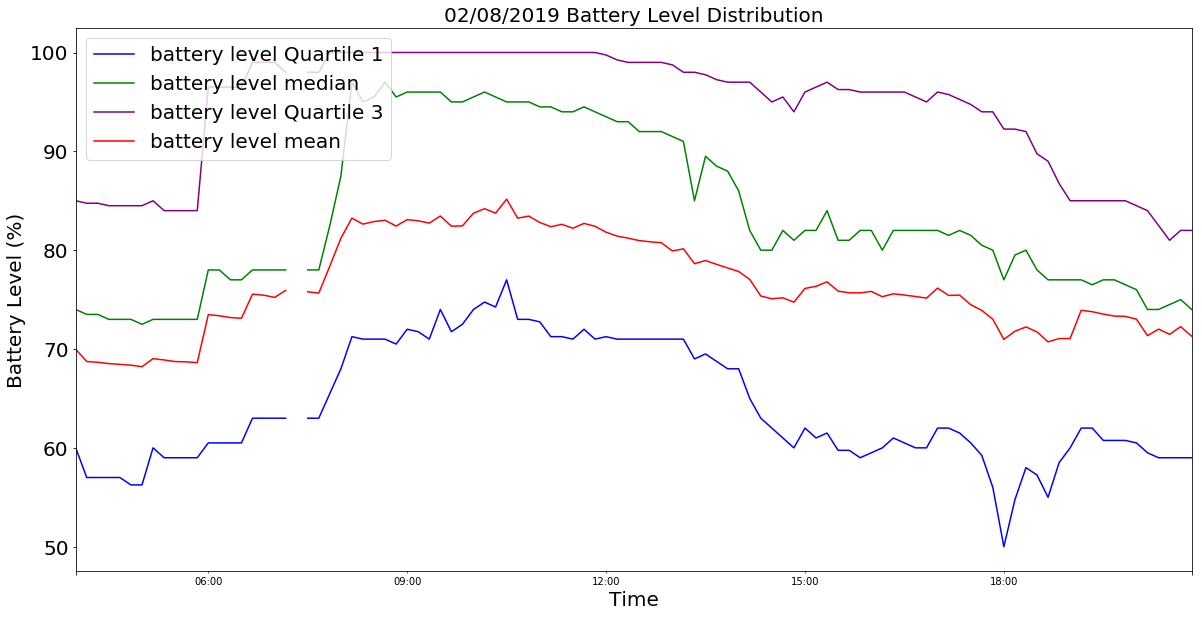

In [12]:
# Returns the large plot of battery and count for the powerpoint
day_df = df[df['date_string'] == '2019-02-08']
fontsize = '20'
freq_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['id'].nunique()
# ax = freq_df.plot(figsize=(20,10), label = 'count', ls='dashed')
# ax1 = ax.twinx()

bat_df = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].mean()
bat_df_q1 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.25)
bat_df_q2 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].median()
bat_df_q3 = day_df.groupby(pd.Grouper(key = 'datetime', freq='10min'))['battery_level'].quantile(0.75)
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax = bat_df_q1.plot(figsize = (20,10), color= 'blue', label = 'battery level Quartile 1')
bat_df_q2.plot(figsize = (20,10), ax=ax, color= 'green', label = 'battery level median')
bat_df_q3.plot(figsize = (20,10), ax=ax, color= 'purple', label = 'battery level Quartile 3')
bat_df.plot(figsize=(20,10), ax=ax, color= 'red', label = 'battery level mean')
ax.set_title("02/08/2019 Battery Level Distribution", fontsize = fontsize)
ax.set_xlabel("Time", fontsize = fontsize)
ax.legend(loc = 2, fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
ax.set_ylabel("Battery Level (%)", fontsize = fontsize)
ax.tick_params(axis = 'both', labelsize = fontsize)
# ax1.set_ylim(bottom=0)

# ax.set_ylim(bottom=0)

ax1.legend(fontsize = fontsize)